In [1]:
import numpy as np
import pandas as pd

In [2]:
%pylab inline
plt.style.use('bmh')

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
import pathlib

In [4]:
%load_ext autoreload
%autoreload 2

In [7]:
CLOUD = False
if CLOUD:
    DATA_DIR = pathlib.Path('/')
else:
    ROOT_DIR = pathlib.Path('/home/ma/Desktop/all/git/ydata/kaggle/timeseries')
    DATA_DIR = ROOT_DIR.joinpath('data')

In [8]:
DATA_DIR

PosixPath('/home/ma/Desktop/all/git/ydata/kaggle/timeseries/data')

# Data loading

In [56]:
data = pd.read_csv(DATA_DIR.joinpath('gestures/UWaveGestureLibraryAll_TRAIN.ts'),
                  sep=',|:', header=None, skiprows=11)

/home/ma/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [57]:
data

,0,1,2,3,4,5,6,7,8,9,...,936,937,938,939,940,941,942,943,944,945
0,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,...,0.503002,0.492524,0.482045,0.463662,0.445278,0.426895,0.408511,0.390129,0.371746,6
1,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,...,-0.424252,-0.424252,-0.424414,-0.426015,-0.437960,-0.449905,-0.461849,-0.473794,-0.485739,5
2,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,...,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,5
3,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,...,-0.131015,-0.286569,0.051284,0.389136,0.149143,0.245672,0.437129,0.639840,0.842551,3
4,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,...,1.819330,1.741195,1.624052,1.506909,1.439170,1.500978,1.618121,1.735263,1.852405,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,...,-0.128241,-0.321706,-0.044231,0.142222,0.328674,0.110026,0.147317,0.184607,0.221897,3
892,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,...,0.233878,0.246070,0.258264,0.270456,0.282650,0.294843,0.307036,0.319229,0.331423,1
893,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,...,-0.213164,-0.187128,0.176418,0.138347,0.198371,0.446330,0.161218,0.225716,0.270101,2
894,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,...,-0.158187,-0.185514,-0.291492,-0.401972,-0.499320,-0.553890,-0.544005,-0.500638,-0.427876,7


In [58]:
COLS = [f'{comp}_{i}' for comp in ['x', 'y', 'z'] for i in range(315)] + ['label']

In [59]:
data.columns = COLS

In [60]:
data.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,z_306,z_307,z_308,z_309,z_310,z_311,z_312,z_313,z_314,label
0,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,...,0.503002,0.492524,0.482045,0.463662,0.445278,0.426895,0.408511,0.390129,0.371746,6
1,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,...,-0.424252,-0.424252,-0.424414,-0.426015,-0.437960,-0.449905,-0.461849,-0.473794,-0.485739,5
2,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,...,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,5
3,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,...,-0.131015,-0.286569,0.051284,0.389136,0.149143,0.245672,0.437129,0.639840,0.842551,3
4,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,...,1.819330,1.741195,1.624052,1.506909,1.439170,1.500978,1.618121,1.735263,1.852405,4


In [61]:
data.label.value_counts()

5    127
1    122
7    112
6    111
4    110
2    108
3    106
8    100
Name: label, dtype: int64

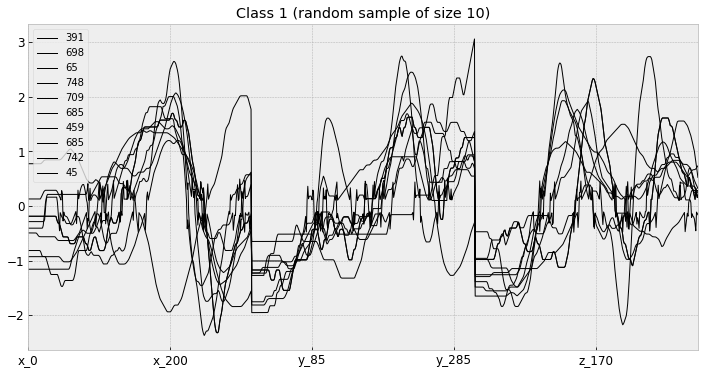

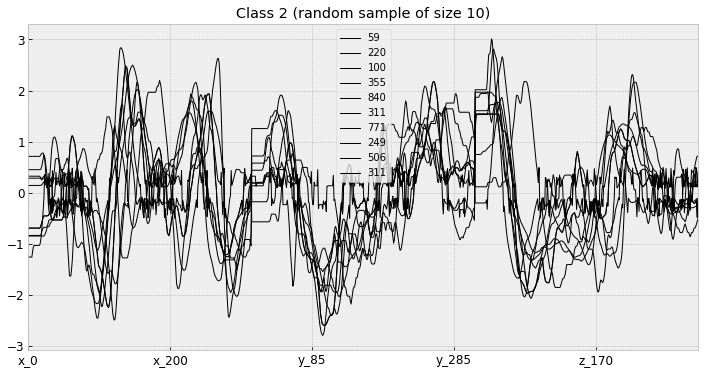

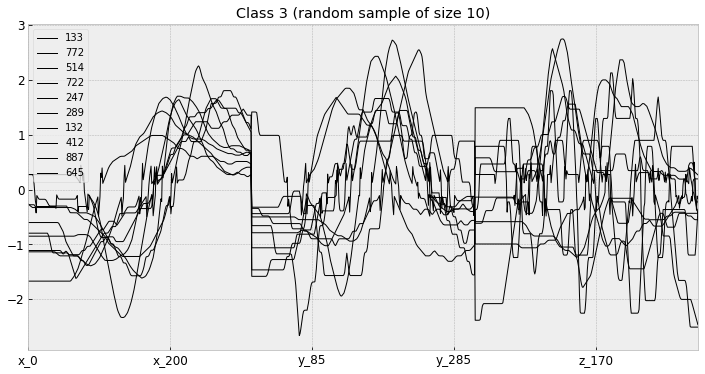

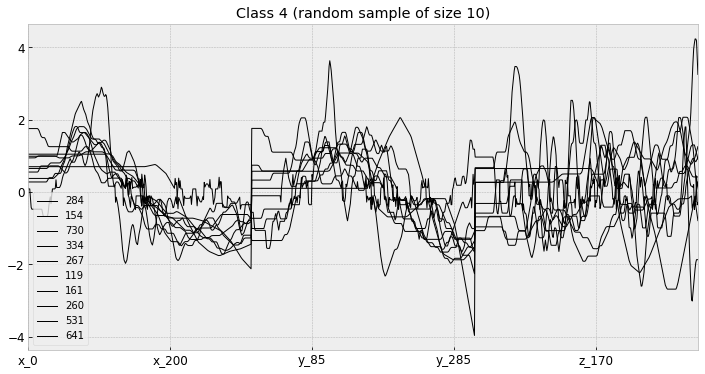

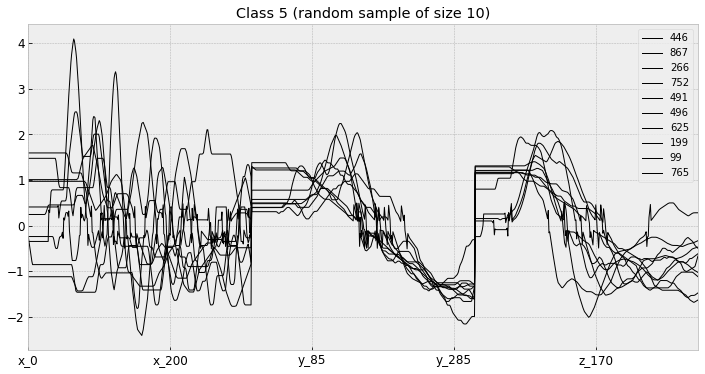

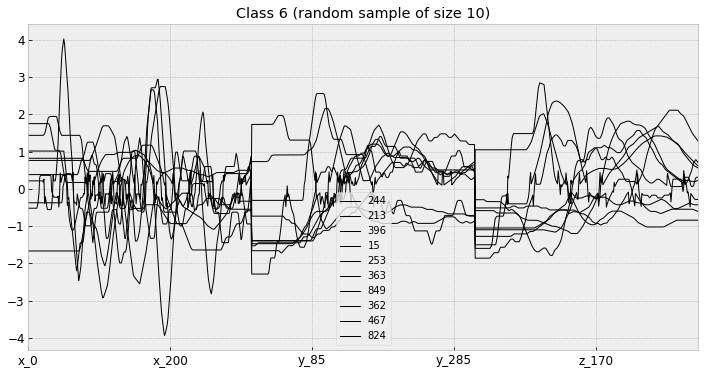

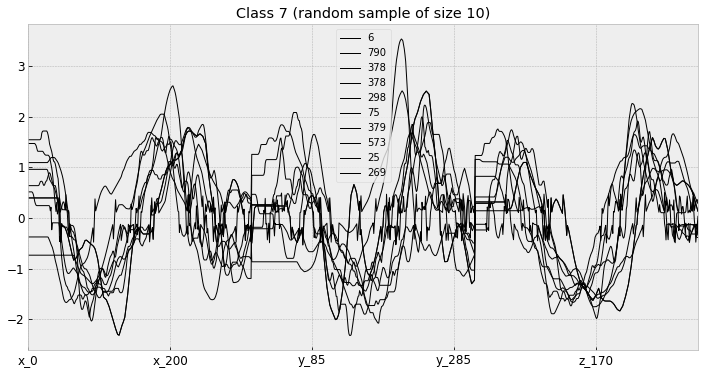

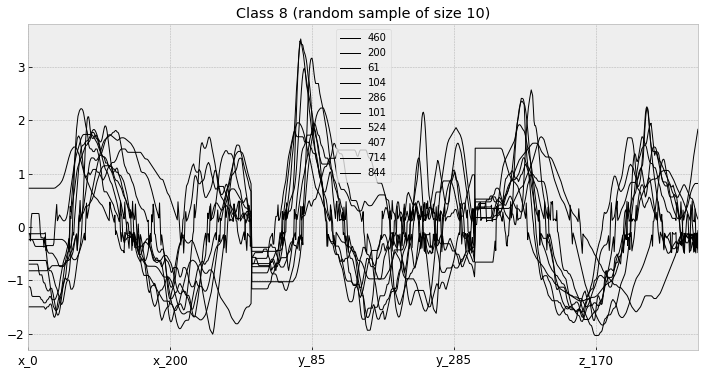

In [70]:
for i in range(1,9):
    sample = data[data.label==i].sample(10, replace=True)
    plt.figure(figsize=(12,6))
    sample.iloc[:,:-1].transpose().plot(ax=plt.gca(), c='k', linewidth=1,
                                       fontsize=12)
    plt.title(f'Class {i} (random sample of size 10)')
    plt.show()

In [69]:
# pandas plots column by column so we want to transpose the matrix,
# this way we plot each sample(column)
# also we skip the last column because it's the label
sample.iloc[:,:-1].transpose() 

,452,139,61,411,39,464,668,554,56,20
x_0,-0.704393,-1.173712,-0.697921,-0.510091,-0.216841,-1.073217,-0.777403,-1.312574,-0.772239,-0.500935
x_1,-0.704393,-1.173712,-0.697921,-0.510091,-0.216841,-1.073217,-0.777403,-1.312574,-0.811198,-0.500935
x_2,-0.704393,-1.173712,-0.697921,-0.510091,-0.216841,-1.073217,-0.777403,-1.312574,-0.840702,-0.500935
x_3,-0.704393,-1.173712,-0.697921,-0.510091,-0.216841,-1.073217,-0.777403,-1.312574,-0.860248,-0.500935
x_4,-0.704393,-1.173712,-0.697921,-0.510091,-0.216841,-1.073217,-0.777403,-1.312574,-0.860248,-0.500935
...,...,...,...,...,...,...,...,...,...,...
z_310,-0.288710,-0.128270,-0.155406,-0.318148,-0.206094,0.146731,-0.274771,-0.320419,0.153548,-0.268483
z_311,-0.305115,-0.160095,-0.143345,-0.292368,-0.083120,0.181225,-0.274771,-0.320419,-0.239912,-0.252264
z_312,-0.301522,-0.191918,-0.124191,-0.273289,-0.104118,0.207341,-0.274771,-0.320419,-0.121120,-0.244962
z_313,-0.259674,-0.223742,-0.356439,-0.259537,-0.110665,0.216156,-0.274771,-0.320419,-0.187894,-0.241709


In [71]:
XCOLS = [cl for cl in data.columns if 'x_' in cl ]
YCOLS = [cl for cl in data.columns if 'y_' in cl ]
ZCOLS = [cl for cl in data.columns if 'z_' in cl ]

In [78]:
acc_data = pd.DataFrame(np.sqrt(np.square(data[XCOLS]).values
            + np.square(data[YCOLS]).values
            + np.square(data[ZCOLS]).values), columns=[f'a_{i}' for i in range(315)])
acc_data

,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,...,a_305,a_306,a_307,a_308,a_309,a_310,a_311,a_312,a_313,a_314
0,2.636155,2.636155,2.636155,2.636155,2.636155,2.636155,2.636155,2.636155,2.636155,2.636155,...,1.036941,0.990631,0.950234,0.910579,0.900982,0.891661,0.882624,0.873881,0.865441,0.857311
1,2.511023,2.511023,2.511023,2.511023,2.511023,2.511023,2.511023,2.511023,2.511023,2.511023,...,1.590073,1.626018,1.662040,1.697686,1.729393,1.732374,1.735432,1.738567,1.741778,1.745065
2,0.867788,0.867788,0.867788,0.867788,0.867788,0.867788,0.867788,0.867788,0.867788,0.867788,...,1.737530,1.730926,1.725473,1.721181,1.718059,1.741511,1.737718,1.736788,1.736788,1.736788
3,0.501780,0.501780,0.501780,0.501780,0.501780,0.501780,0.501780,0.501780,0.501780,0.501780,...,1.958194,2.004288,2.081158,2.121624,2.207845,2.202367,2.184865,1.943222,1.710696,1.532877
4,1.418190,1.418190,1.418190,1.418190,1.418190,1.418190,1.418190,1.418190,1.418190,1.418190,...,3.209007,3.218632,3.188670,3.126244,3.067023,3.026890,3.030426,3.057013,3.088984,3.126174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0.537141,0.537141,0.537141,0.537141,0.537141,0.537141,0.537141,0.537141,0.537141,0.537141,...,0.732171,0.692405,0.736285,0.657766,0.677816,0.745856,0.675148,0.673868,0.673972,0.679339
892,1.889050,1.889050,1.889050,1.889050,1.889050,1.889050,1.889050,1.889050,1.889050,1.889050,...,0.345952,0.412640,0.493715,0.583206,0.654710,0.714477,0.539208,0.548706,0.558602,0.568875
893,0.752113,0.752113,0.752113,0.752113,0.752113,0.752113,0.752113,0.752113,0.752113,0.752113,...,2.374815,2.381929,2.376237,2.351202,2.324993,2.308067,2.307208,2.211451,2.137873,2.041003
894,1.353530,1.353530,1.353530,1.353530,1.353530,1.353530,1.354594,1.358044,1.376050,1.392222,...,0.568110,0.522475,0.472347,0.428043,0.462719,0.630425,0.589129,0.590025,0.561519,0.514386


In [80]:
data = data.join(acc_data)

In [81]:
data

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,a_305,a_306,a_307,a_308,a_309,a_310,a_311,a_312,a_313,a_314
0,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,...,1.036941,0.990631,0.950234,0.910579,0.900982,0.891661,0.882624,0.873881,0.865441,0.857311
1,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,...,1.590073,1.626018,1.662040,1.697686,1.729393,1.732374,1.735432,1.738567,1.741778,1.745065
2,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,...,1.737530,1.730926,1.725473,1.721181,1.718059,1.741511,1.737718,1.736788,1.736788,1.736788
3,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,...,1.958194,2.004288,2.081158,2.121624,2.207845,2.202367,2.184865,1.943222,1.710696,1.532877
4,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,...,3.209007,3.218632,3.188670,3.126244,3.067023,3.026890,3.030426,3.057013,3.088984,3.126174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,...,0.732171,0.692405,0.736285,0.657766,0.677816,0.745856,0.675148,0.673868,0.673972,0.679339
892,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,...,0.345952,0.412640,0.493715,0.583206,0.654710,0.714477,0.539208,0.548706,0.558602,0.568875
893,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,...,2.374815,2.381929,2.376237,2.351202,2.324993,2.308067,2.307208,2.211451,2.137873,2.041003
894,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,...,0.568110,0.522475,0.472347,0.428043,0.462719,0.630425,0.589129,0.590025,0.561519,0.514386


In [82]:
ACOLS = [cl for cl in data.columns if 'a_' in cl ]

In [84]:
AGGS = ['mean', 'std', 'median', 'min', 'max', 'skew']

In [85]:
data.apply(AGGS, axis=1) # For each sample

,mean,std,median,min,max,skew
0,0.412290,1.164846,0.604478,-3.002771,6.000000,-0.358305
1,0.424717,1.156601,0.669197,-1.659557,5.000000,-0.006999
2,0.424112,1.156823,0.623948,-1.639466,5.000000,-0.183634
3,0.384336,1.165214,0.365807,-1.938213,4.769542,0.462088
4,0.409532,1.158991,0.455590,-2.247183,4.000000,-0.017337
...,...,...,...,...,...,...
891,0.371257,1.169451,0.186840,-2.562333,3.462201,0.351557
892,0.406487,1.154921,0.409978,-1.850326,2.519481,-0.051160
893,0.400158,1.158160,0.331156,-2.788136,3.424597,-0.164326
894,0.421007,1.166154,0.528296,-2.166109,7.000000,-0.067326


In [86]:
features = []

for comp, cols in zip(['x', 'y', 'z', 'a'], [XCOLS, YCOLS, ZCOLS, ACOLS]):
    features.append(data[cols]
                    .apply(AGGS, axis=1)
                    .rename(lambda cl: f'{comp}_{cl}', axis=1))

In [87]:
features[0]

,x_mean,x_std,x_median,x_min,x_max,x_skew
0,-0.009253,0.997583,0.372056,-3.002771,1.741171,-0.742626
1,-0.006201,1.002359,-0.234908,-1.167222,1.629721,0.499300
2,-0.011643,1.003550,-0.114947,-1.639466,2.097296,0.056455
3,0.015471,1.001682,-0.277678,-1.334142,2.660826,0.965558
4,-0.006768,1.000159,0.136838,-1.507488,1.272493,0.034201
...,...,...,...,...,...,...
891,0.002676,1.001640,0.126056,-2.291087,1.725760,-0.482823
892,-0.000373,1.001311,-0.243468,-1.232312,1.497695,0.223519
893,0.001489,1.001292,0.257141,-2.271709,2.106523,-0.452168
894,-0.010654,1.002987,-0.227565,-1.658029,2.141460,0.421246


In [88]:
features[1]

,y_mean,y_std,y_median,y_min,y_max,y_skew
0,0.017712,1.008198,0.409937,-2.121593,1.392263,-0.772310
1,0.002443,1.000379,0.281072,-1.659557,1.445448,-0.154260
2,0.006169,0.999898,-0.184654,-1.558264,1.622728,-0.008329
3,-0.007574,1.001403,0.265000,-1.938213,3.288124,0.662616
4,0.011105,1.002751,0.282799,-2.247183,1.662789,-0.383182
...,...,...,...,...,...,...
891,-0.008535,1.000007,-0.404282,-1.037922,2.716361,1.471329
892,0.000782,1.001417,-0.208793,-1.850326,1.927486,0.200853
893,0.000805,0.999759,0.199268,-2.788136,1.923506,-0.725287
894,0.007944,0.999583,0.346297,-2.166109,1.525729,-0.523316


In [89]:
features = pd.concat(features, axis=1)
features

,x_mean,x_std,x_median,x_min,x_max,x_skew,y_mean,y_std,y_median,y_min,...,z_median,z_min,z_max,z_skew,a_mean,a_std,a_median,a_min,a_max,a_skew
0,-0.009253,0.997583,0.372056,-3.002771,1.741171,-0.742626,0.017712,1.008198,0.409937,-2.121593,...,0.512562,-1.533134,1.236129,-0.544683,1.631422,0.579963,1.422149,0.640755,3.197382,0.574788
1,-0.006201,1.002359,-0.234908,-1.167222,1.629721,0.499300,0.002443,1.000379,0.281072,-1.659557,...,-0.422873,-1.162087,1.789252,0.706786,1.684341,0.400410,1.596626,1.131273,2.511023,0.824909
2,-0.011643,1.003550,-0.114947,-1.639466,2.097296,0.056455,0.006169,0.999898,-0.184654,-1.558264,...,0.219749,-1.440588,1.317989,-0.017563,1.681922,0.410488,1.774450,0.867788,2.475498,-0.760101
3,0.015471,1.001682,-0.277678,-1.334142,2.660826,0.965558,-0.007574,1.001403,0.265000,-1.938213,...,0.186464,-1.863714,2.564909,0.219132,1.529040,0.812995,1.307562,0.501780,4.769542,1.669192
4,-0.006768,1.000159,0.136838,-1.507488,1.272493,0.034201,0.011105,1.002751,0.282799,-2.247183,...,-0.475621,-1.822190,1.852405,0.663327,1.626732,0.593032,1.418190,0.913555,3.218632,1.166391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0.002676,1.001640,0.126056,-2.291087,1.725760,-0.482823,-0.008535,1.000007,-0.404282,-1.037922,...,-0.147868,-2.562333,2.563744,0.207206,1.476681,0.904896,1.178561,0.404585,3.462201,0.597400
892,-0.000373,1.001311,-0.243468,-1.232312,1.497695,0.223519,0.000782,1.001417,-0.208793,-1.850326,...,0.194200,-1.363224,1.826780,0.153656,1.624065,0.600319,1.837889,0.272182,2.519481,-0.705220
893,0.001489,1.001292,0.257141,-2.271709,2.106523,-0.452168,0.000805,0.999759,0.199268,-2.788136,...,0.106353,-1.832091,2.294435,0.483905,1.595554,0.672658,1.596254,0.466425,3.424597,0.387496
894,-0.010654,1.002987,-0.227565,-1.658029,2.141460,0.421246,0.007944,0.999583,0.346297,-2.166109,...,0.203966,-1.503999,2.119924,0.024832,1.663141,0.481168,1.649200,0.428043,2.637717,-0.233015


In [90]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 895
Data columns (total 24 columns):
x_mean      896 non-null float64
x_std       896 non-null float64
x_median    896 non-null float64
x_min       896 non-null float64
x_max       896 non-null float64
x_skew      896 non-null float64
y_mean      896 non-null float64
y_std       896 non-null float64
y_median    896 non-null float64
y_min       896 non-null float64
y_max       896 non-null float64
y_skew      896 non-null float64
z_mean      896 non-null float64
z_std       896 non-null float64
z_median    896 non-null float64
z_min       896 non-null float64
z_max       896 non-null float64
z_skew      896 non-null float64
a_mean      896 non-null float64
a_std       896 non-null float64
a_median    896 non-null float64
a_min       896 non-null float64
a_max       896 non-null float64
a_skew      896 non-null float64
dtypes: float64(24)
memory usage: 175.0 KB


In [91]:
features.describe()

,x_mean,x_std,x_median,x_min,x_max,x_skew,y_mean,y_std,y_median,y_min,...,z_median,z_min,z_max,z_skew,a_mean,a_std,a_median,a_min,a_max,a_skew
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,...,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,0.000205,1.001093,-0.004687,-1.827719,1.861302,0.033726,-0.000250,1.000813,-0.006802,-1.653017,...,-0.012727,-1.688618,1.901902,0.098162,1.622905,0.583466,1.582011,0.573272,3.044320,0.347637
std,0.009546,0.002093,0.282324,0.491523,0.504342,0.510727,0.008977,0.002036,0.309300,0.421597,...,0.291065,0.416197,0.527855,0.545537,0.055563,0.143732,0.161764,0.255683,0.586360,0.652606
min,-0.059989,0.990147,-0.693738,-4.433968,0.498750,-2.086030,-0.070002,0.990998,-0.757887,-4.096937,...,-0.756247,-3.542302,0.461240,-1.966475,1.362020,0.226196,0.772821,0.158346,2.045143,-1.751008
25%,-0.002875,1.000178,-0.235711,-2.094983,1.528834,-0.304475,-0.003061,0.999931,-0.261869,-1.894690,...,-0.229796,-1.909754,1.539164,-0.259616,1.594041,0.477300,1.512539,0.351468,2.666510,-0.086239
50%,0.000044,1.000952,-0.090703,-1.743756,1.795364,0.025873,-0.000004,1.000818,-0.086143,-1.584641,...,-0.100647,-1.638847,1.813221,0.072274,1.632419,0.577142,1.609031,0.536253,2.926731,0.270983
75%,0.002748,1.001816,0.210332,-1.478950,2.094417,0.345089,0.002795,1.001549,0.247273,-1.369817,...,0.222790,-1.433486,2.193290,0.438776,1.664252,0.676246,1.690326,0.763344,3.291100,0.706993
max,0.076977,1.014848,0.807331,-0.789804,4.417596,2.546233,0.040012,1.015112,0.736611,-0.721249,...,0.724115,-0.555410,4.771797,2.464054,1.716340,1.070216,1.947768,1.352161,9.171661,4.289380


# Dimensionality reduction

In [93]:
from sklearn.decomposition import PCA

In [94]:
pca = PCA(n_components=5, whiten=True)
fts_pca = pca.fit_transform(features)

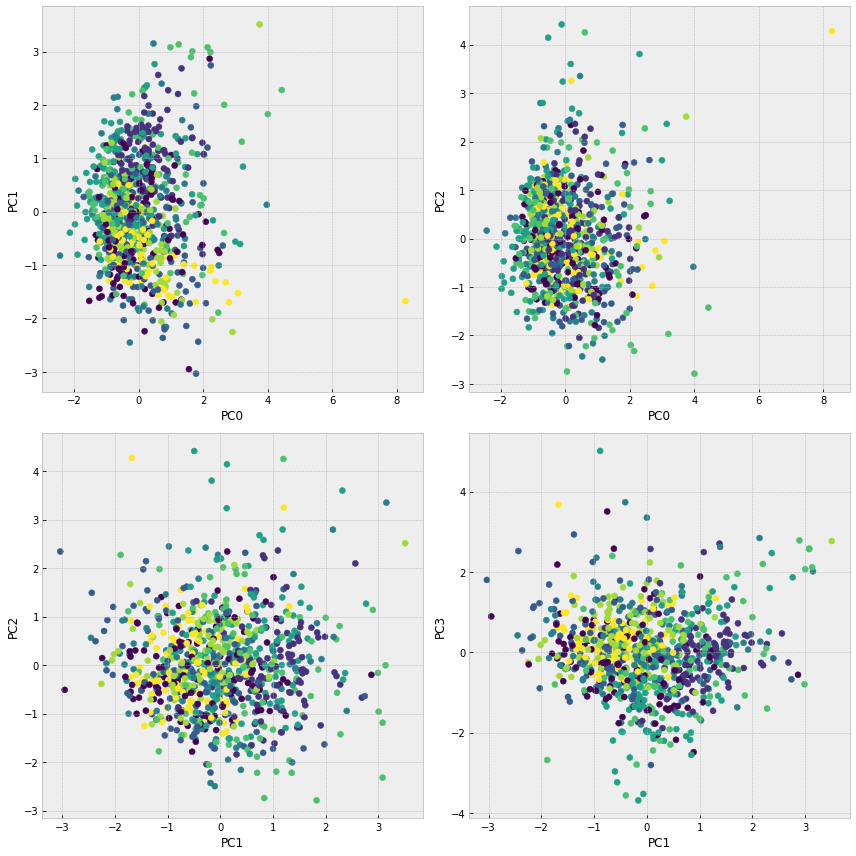

In [98]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.scatter(fts_pca[:, 0], fts_pca[:, 1], c=data['label'].values)
plt.xlabel('PC0')
plt.ylabel('PC1')

plt.subplot(2,2,2)
plt.scatter(fts_pca[:, 0], fts_pca[:, 2], c=data['label'].values)
plt.xlabel('PC0')
plt.ylabel('PC2')

plt.subplot(2,2,3)
plt.scatter(fts_pca[:, 1], fts_pca[:, 2], c=data['label'].values)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(2,2,4)
plt.scatter(fts_pca[:, 1], fts_pca[:, 3], c=data['label'].values)
plt.xlabel('PC1')
plt.ylabel('PC3')

plt.tight_layout()

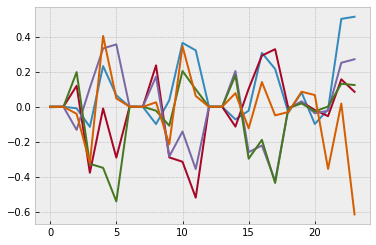

In [101]:
plt.plot(pca.components_.T)

In [102]:
features.columns

Index(['x_mean', 'x_std', 'x_median', 'x_min', 'x_max', 'x_skew', 'y_mean',
       'y_std', 'y_median', 'y_min', 'y_max', 'y_skew', 'z_mean', 'z_std',
       'z_median', 'z_min', 'z_max', 'z_skew', 'a_mean', 'a_std', 'a_median',
       'a_min', 'a_max', 'a_skew'],
      dtype='object')

Text(0, 0.5, 'x_skew')

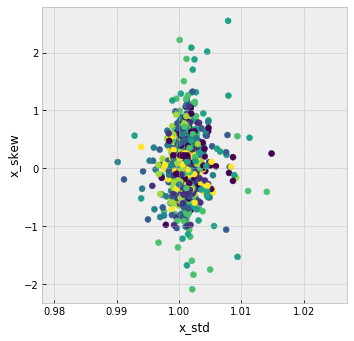

In [104]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.scatter(features['x_std'], features['x_skew'], c=data['label'].values)
plt.xlabel('x_std')
plt.ylabel('x_skew')